# **STACKED CHART**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

---

CONNECT TO DATABASE AND LOAD DATASET

In [2]:
conn = sqlite3.connect('my_analysis.db')

query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


---

#### STACKED CHART FOR COMPOSITION OF JOB SATISFACTION ACROSS AGE GROUPS

In [3]:
# Fix Age column
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
age_order = ['Under 18 years old','18-24 years old','25-34 years old',
             '35-44 years old', '45-54 years old','55-64 years old',
             '65 years or older']

# Convert Age column to categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Create numerical age column
df['Num_Age'] = df['Age'].map(age_map)

df[['Age', 'Num_Age']].head()

,Age,Num_Age
0,Under 18 years old,17.0
1,35-44 years old,39.5
2,45-54 years old,49.5
3,18-24 years old,21.0
4,18-24 years old,21.0


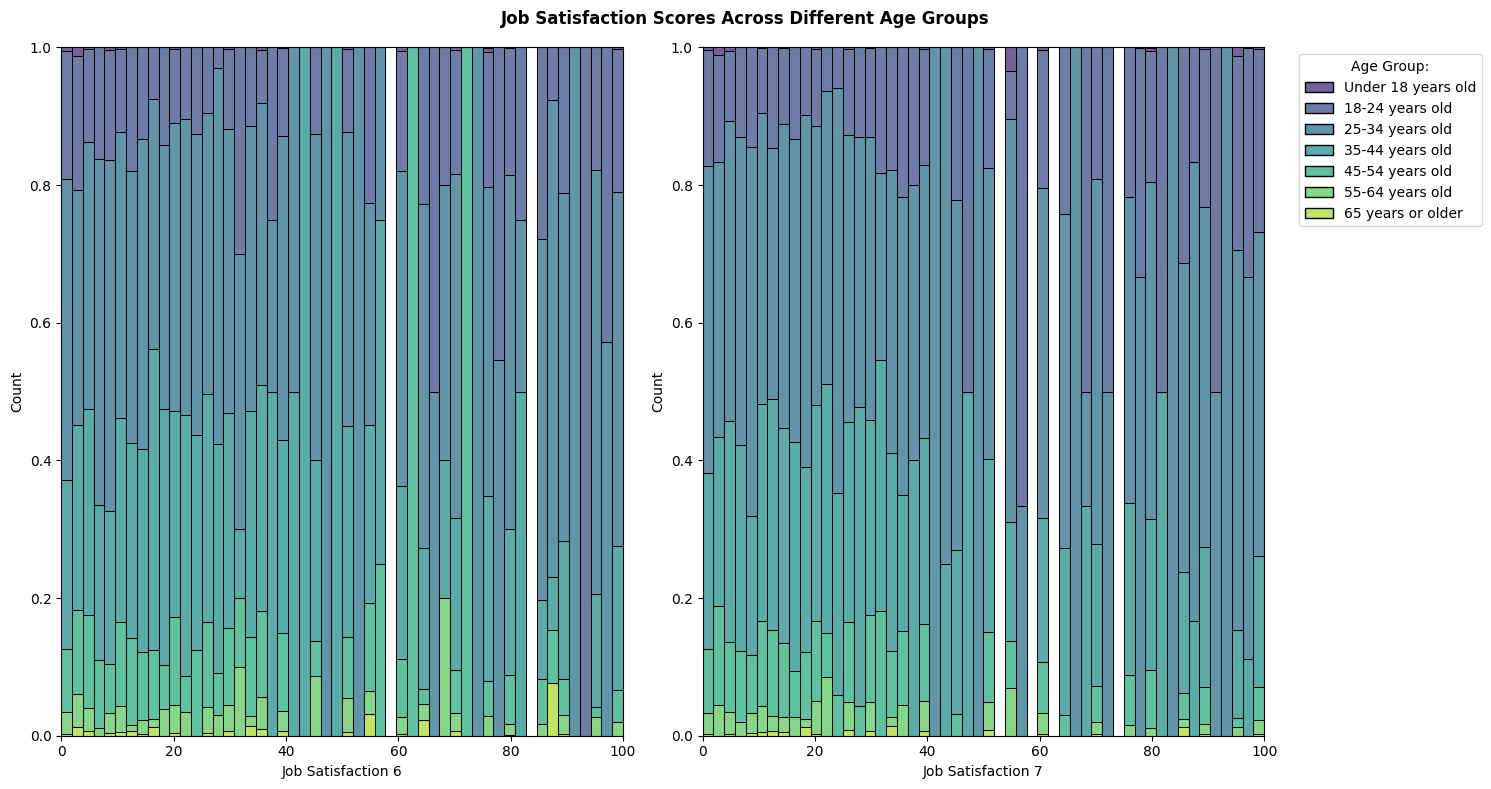

In [4]:
# Select Data
jobsat_age = df[df['Age'] != 'Prefer not to say'][['JobSatPoints_6', 'JobSatPoints_7', 'Age','Num_Age']].dropna().copy()

# Create Sub Plots
fig, ax = plt.subplots(1, 2, figsize=(15,8))

# JobSat6 Stacked Chart
sns.histplot(jobsat_age, x='JobSatPoints_6',hue='Age', multiple='fill', ax=ax[0],palette='viridis', element='bars', legend=False)
ax[0].set_xlabel("Job Satisfaction 6")

# JobSat7 Stacked Chart
sns.histplot(jobsat_age, x='JobSatPoints_7',hue='Age', multiple='fill', ax=ax[1], palette='viridis', element='bars')
ax[1].set_xlabel("Job Satisfaction 7")

# Adjust legend
sns.move_legend(
    ax[1],
    loc='upper left',
    bbox_to_anchor=(1.05,1),
    title="Age Group:"
)

# Adjust layout and set title
plt.suptitle("Job Satisfaction Scores Across Different Age Groups", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

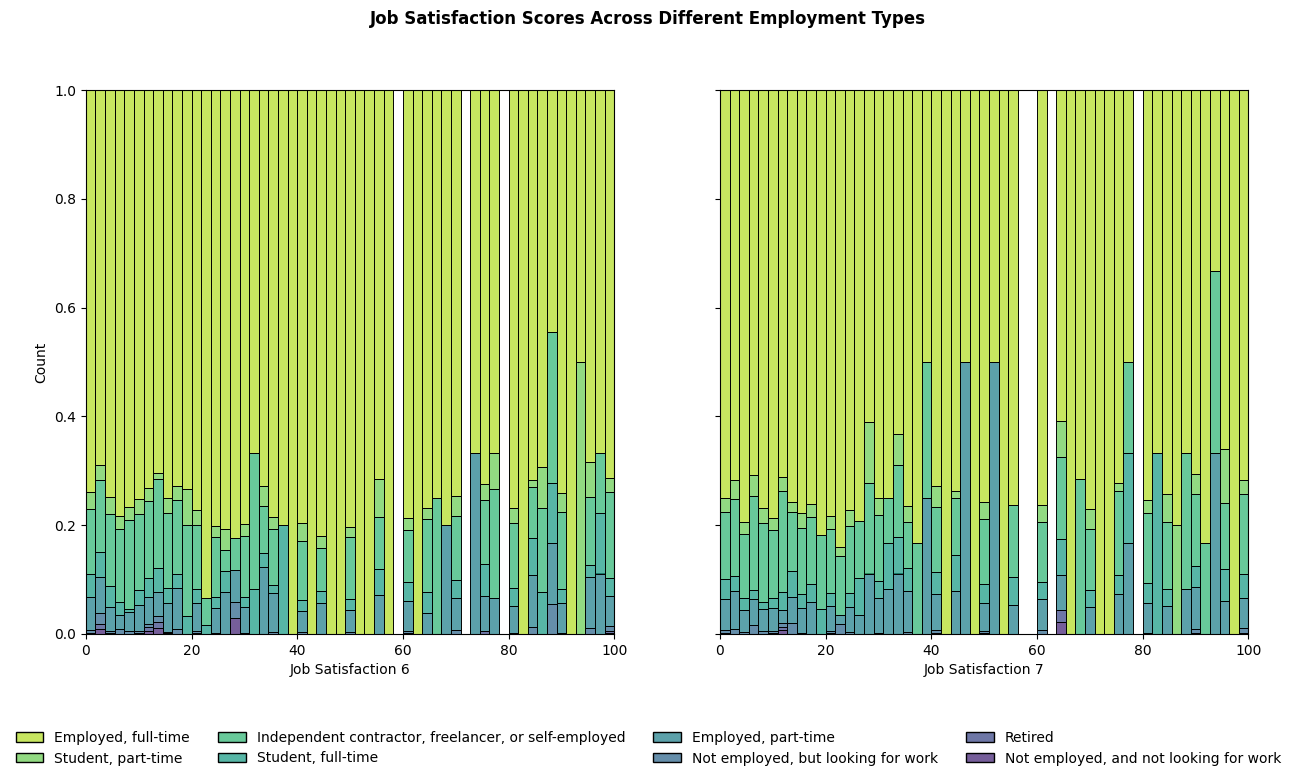

In [20]:
# Select Data
jobsat_emp = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].dropna().copy()

# Fix Employment values
jobsat_emp['emp'] = jobsat_emp['Employment'].str.split(';')
jobsat_explode = jobsat_emp.explode('emp')

# Create Sub Plots
fig, ax = plt.subplots(1, 2, figsize=(15,8), sharey=True)

# JobSat6 Stacked Chart
sns.histplot(jobsat_explode, x='JobSatPoints_6', hue='emp', multiple='fill', 
             ax=ax[0], palette='viridis_r', element='bars', legend=False)
ax[0].set_xlabel("Job Satisfaction 6")

# JobSat7 Stacked Chart
sns.histplot(jobsat_explode, x='JobSatPoints_7', hue='emp', multiple='fill', 
             ax=ax[1], palette='viridis_r', element='bars') # Keep legend for now
ax[1].set_xlabel("Job Satisfaction 7")

# --- THE FIX ---

# 1. Grab handles/labels BEFORE messing with layout
# Note: Sometimes histplot doesn't return handles easily. 
# We explicitly get the legend object first.
lines, labels = ax[1].get_legend_handles_labels()

# If that returns empty (common in some seaborn versions), try this fallback:
if not lines:
    lines = ax[1].get_legend().legend_handles
    labels = [t.get_text() for t in ax[1].get_legend().get_texts()]

# 2. Remove the subplot legend
if ax[1].get_legend():
    ax[1].get_legend().remove()
    

# 4. Adjust Bottom Margin SECOND (Creates the empty floor for the legend)
plt.subplots_adjust(bottom=0.2) # Increased to 0.2 to be safe

# 5. Add Global Legend
fig.legend(
    lines, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.02), # Lift it slightly off the absolute bottom
    ncol=4, # Adjust based on how many employment types you have
    frameon=False
)

plt.suptitle("Job Satisfaction Scores Across Different Employment Types", y=0.98, fontsize=12, fontweight='bold')
plt.show()

---

#### STACKED CHART FOR COMPENSATION AND JOB SATISFACTION BY AGE GROUP

Stacked Chart visualize the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35

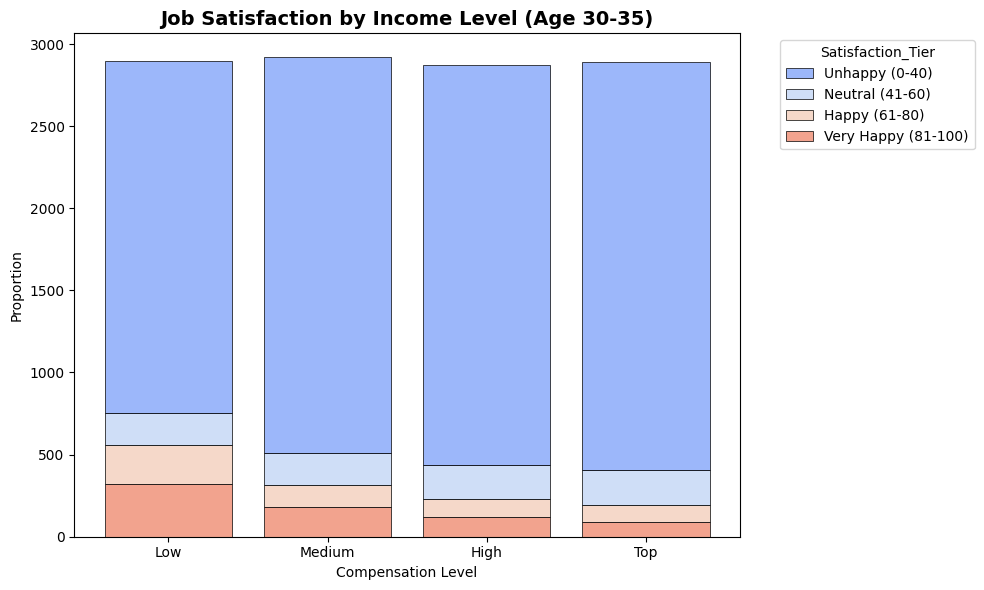

In [6]:
# Select Data
comp_sat_age = df[df['ConvertedCompYearly'] < 300000][['ConvertedCompYearly', 'JobSatPoints_6', 'Age', 'Num_Age']].dropna().copy()

# Filter for age 30-35
compsat_age = comp_sat_age[comp_sat_age['Age'].str.contains("25-34|35-44", case=False, na=False)].sort_values('Age')

# Create a compensation and satisfaction bins
# Compensation Bin
compsat_age['Comp_Bin'] = pd.qcut(compsat_age['ConvertedCompYearly'], q=4, labels=['Low', 'Medium', 'High', 'Top'])

# Satisfaction bins
bins = [-1, 40, 60, 80, 100]
labels = ['Unhappy (0-40)', 'Neutral (41-60)', 'Happy (61-80)', 'Very Happy (81-100)']
compsat_age['Satisfaction_Tier'] = pd.cut(compsat_age['JobSatPoints_6'], bins=bins, labels=labels)

# Create a figure
plt.figure(figsize=(10,6))

# Compensation Level and Job Satisfaction Level
ax = sns.histplot(compsat_age, x='Comp_Bin', hue='Satisfaction_Tier',
             multiple='stack', palette='coolwarm', discrete=True,
             shrink=0.8, edgecolor='black', linewidth=0.5)
plt.title("Job Satisfaction by Income Level (Age 30-35)", fontsize=14, weight='bold')
plt.xlabel("Compensation Level")
plt.ylabel("Proportion")

sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

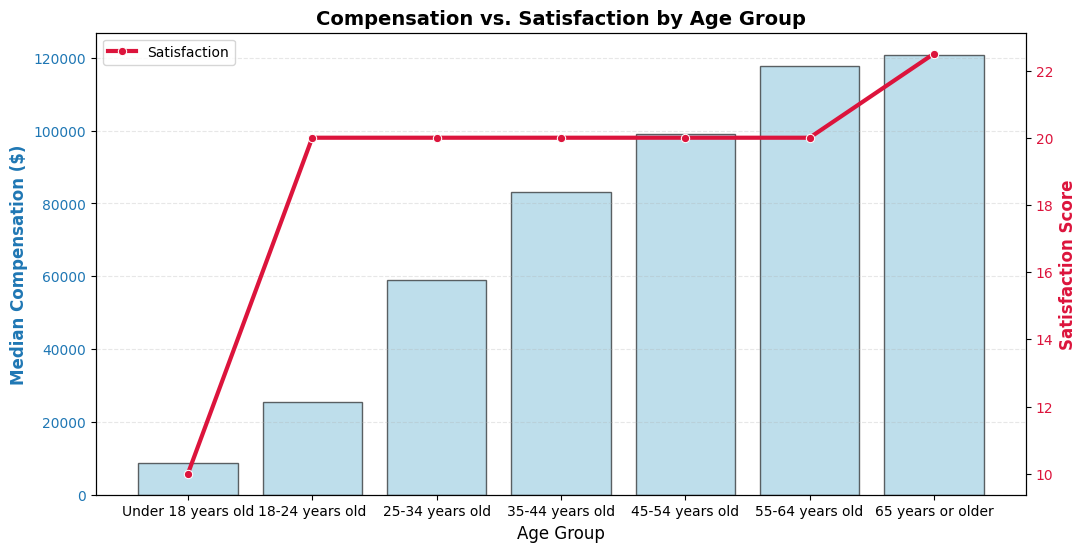

In [7]:
age_metrics = comp_sat_age.groupby('Age', observed=True)[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# 2. Create the Base Figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Layer 1: Bars (Compensation) on Left Axis ---
sns.barplot(
    data=age_metrics,
    x='Age',
    y='ConvertedCompYearly',
    ax=ax1,
    color='skyblue',       # Use a light color so the line stands out
    alpha=0.6,             # Make it slightly transparent
    edgecolor='black'
)
ax1.set_ylabel('Median Compensation ($)', color='tab:blue', fontsize=12, fontweight='bold')
ax1.set_title("Compensation vs. Satisfaction by Age Group", fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel("Age Group", fontsize=12)

# --- Layer 2: Line (Satisfaction) on Right Axis ---
ax2 = ax1.twinx()  # <--- THE MAGIC COMMAND: Creates a 2nd Y-axis sharing the same X

sns.lineplot(
    data=age_metrics,
    x='Age',
    y='JobSatPoints_6',
    ax=ax2,
    color='crimson',      # High contrast color
    marker='o',           # Add dots so points are visible
    linewidth=3,
    label='Satisfaction'  # Label for the legend
)
ax2.set_ylabel('Satisfaction Score', color='crimson', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='crimson')

# Set limits for Satisfaction to make it "float" nicely above the bars
# (e.g., if scores are 0-100, set limits to 0-110 so the line isn't cut off)
#ax2.set_ylim(0, 100) 

# Add a grid for the primary axis (Money) to make it readable
ax1.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

---

COMPARING DATA USING STACKED CHARTS

Stacked Chart of Preferred Databases by Age Group

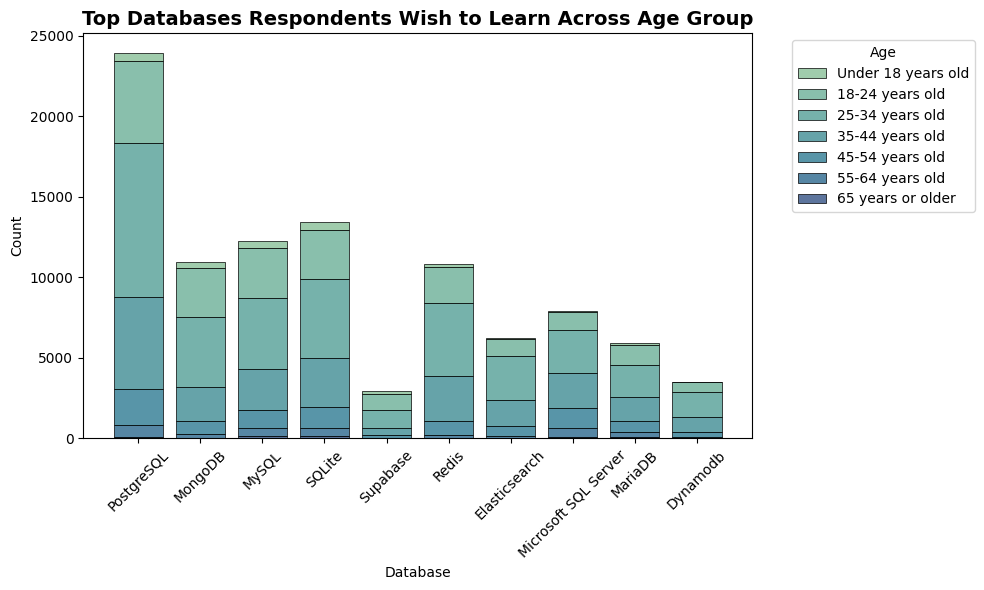

In [8]:
# Select Data
db_age = df[['DatabaseWantToWorkWith', 'Age']].dropna().copy()

# Fix Database Column
db_age['Database'] = db_age['DatabaseWantToWorkWith'].str.split(';')
database_age = db_age.explode('Database')

# Pick Top 10 Database
top_database = database_age['Database'].value_counts().nlargest(10)
plot_df = database_age[database_age['Database'].isin(top_database.index)]

# Stacked Chart
plt.figure(figsize=(10,6))
ax = sns.histplot(plot_df, x='Database', hue='Age', palette='crest', 
             discrete=True, edgecolor='black', shrink=0.8,
             multiple='stack', linewidth=0.5)

plt.title("Top Databases Respondents Wish to Learn Across Age Group", fontsize=14, weight='bold')
sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Stacked Chart of Employment Type by Job Satisfaction

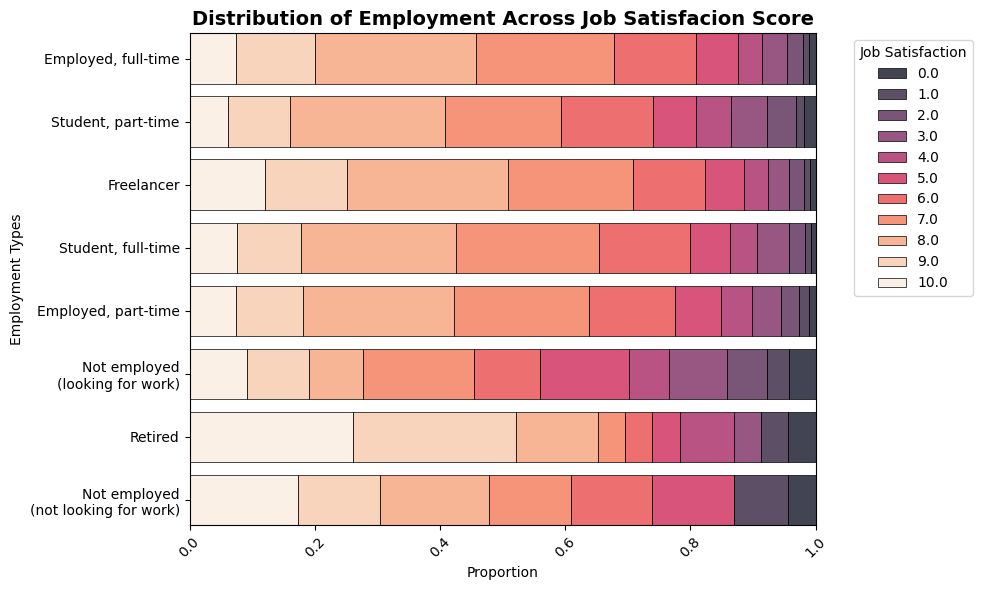

In [9]:
# Select Data
employment_sat = df[['Employment', 'JobSat']].dropna().copy()

# Fix Employment Values
employment_sat['emp'] = employment_sat['Employment'].str.split(';')
emp_explode = employment_sat.explode('emp')

# Shorten employment values
emp_short = {
    'Independent contractor, freelancer, or self-employed' : 'Freelancer',
    'Not employed, but looking for work' : 'Not employed\n(looking for work)',
    'Not employed, and not looking for work' : 'Not employed\n(not looking for work)'
}

emp_explode['emp'] = emp_explode['emp'].replace(emp_short)

# Stacked Chart
plt.figure(figsize=(10,6))
ax = sns.histplot(emp_explode, y='emp', hue='JobSat', palette='rocket',
             discrete=True, edgecolor='black', linewidth=0.5,
             multiple='fill', shrink=0.8)

plt.title("Distribution of Employment Across Job Satisfacion Score", fontsize=14, weight='bold')
plt.ylabel("Employment Types")
plt.xlabel("Proportion")
plt.xticks(rotation=45)

sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc='upper left', title="Job Satisfaction")

plt.tight_layout()
plt.show()

#### EXPLORING TECHNOLOGY PREFERENCES USING STACKED CHARTS

Stacked Chart for Preferred Programming Languages by Age Group

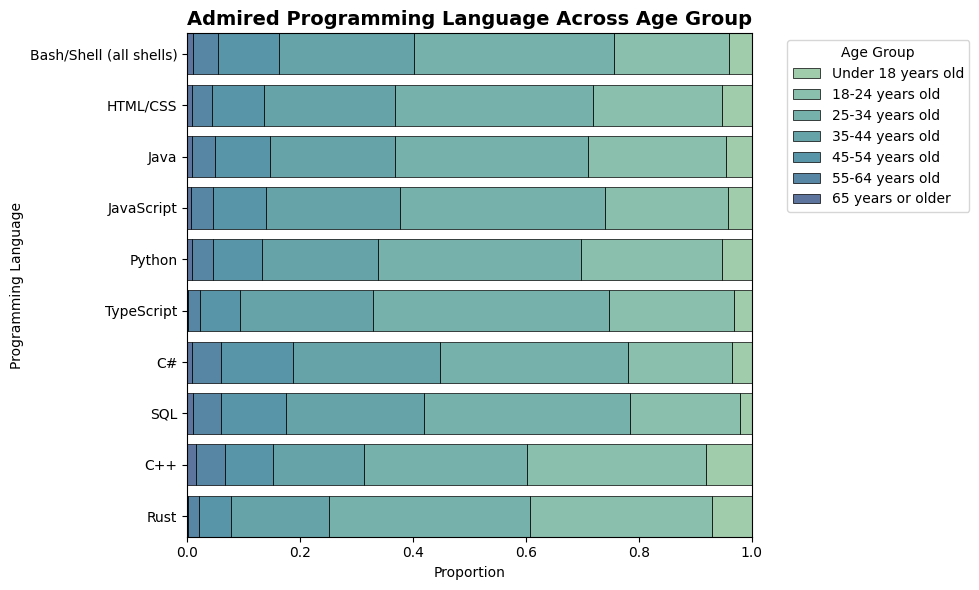

In [10]:
# Select Language
lang_age = df[['LanguageAdmired', 'Age']].dropna().copy()

# Fix Language Collumn
lang_age['Language'] = lang_age['LanguageAdmired'].str.split(';')
lang_explode = lang_age.explode('Language')

# Pick Top 10
top_lang = lang_explode['Language'].value_counts().nlargest(10)
plot_df = lang_explode[lang_explode['Language'].isin(top_lang.index)]

# Stacked Chart
plt.figure(figsize=(10,6))
ax = sns.histplot(plot_df, y='Language', hue='Age', palette='crest',
             multiple='fill', edgecolor='black', shrink=0.8,
             linewidth=0.5, discrete=True)
plt.title("Admired Programming Language Across Age Group", fontsize=14, weight='bold')
plt.ylabel("Programming Language")
plt.xlabel("Proportion")

sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc="upper left", title="Age Group")

plt.tight_layout()
plt.show()

Stacked Chart for Technology Adoption by Employment Type

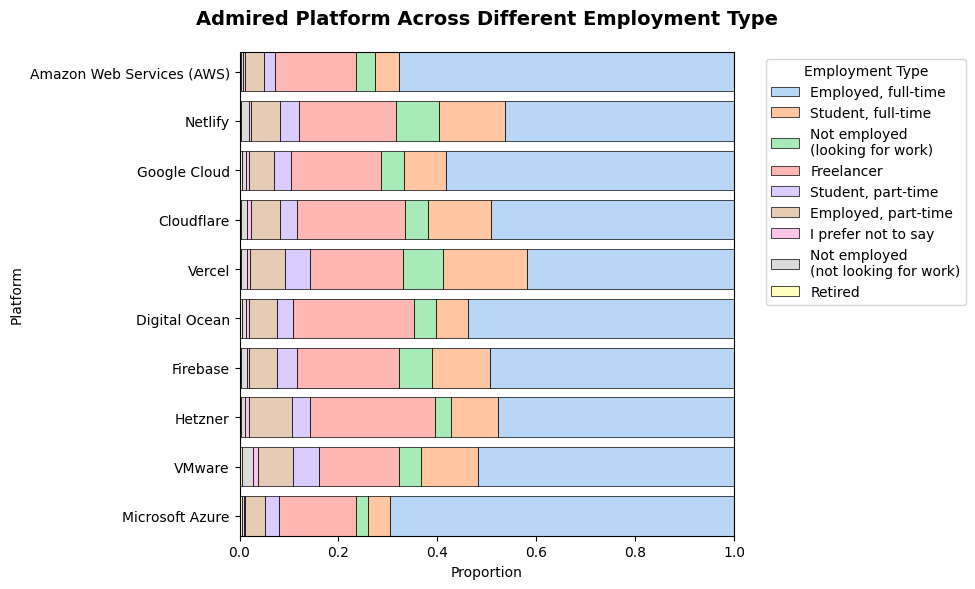

In [18]:
# Select Data
tech_emp = df[['PlatformAdmired', 'Employment']].dropna().copy()

# Fix collumn values:
# Platform collumn
tech_emp['Platform'] = tech_emp['PlatformAdmired'].str.split(';')
tech_explode = tech_emp.explode('Platform')

# Employment Collumn
tech_explode['emp'] = tech_explode['Employment'].str.split(';')
techemp_data = tech_explode.explode('emp')

# Shorten Employment Values
emp_short = {
    'Independent contractor, freelancer, or self-employed' : 'Freelancer',
    'Not employed, but looking for work' : 'Not employed\n(looking for work)',
    'Not employed, and not looking for work' : 'Not employed\n(not looking for work)'
}
techemp_data['emp'] = techemp_data['emp'].replace(emp_short)

# Pick top 10 Platform
top_platform = techemp_data['Platform'].value_counts().nlargest(10)
plot_df = techemp_data[techemp_data['Platform'].isin(top_platform.index)]

# Stacked Chart
plt.figure(figsize=(10,6))
ax = sns.histplot(plot_df, y='Platform', hue='emp', multiple='fill',
             edgecolor='black', linewidth=0.5, shrink=0.8,
             discrete=True, palette='pastel')

plt.title("Admired Platform Across Different Employment Type", fontsize=14, weight='bold', pad=20)
plt.ylabel("Platform")
plt.xlabel("Proportion")

sns.move_legend(ax, bbox_to_anchor=(1.05, 1), loc="upper left", title="Employment Type")

plt.tight_layout()
plt.show()

---

In [19]:
conn.close()

---

#### **Summary**

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.